In [41]:
import numpy as np
import matplotlib.pyplot as plt

Selected Points Kernel Matrix:
[[1.00e+00 1.99e-07 7.26e-06]
 [1.99e-07 1.00e+00 1.27e-08]
 [7.26e-06 1.27e-08 1.00e+00]]


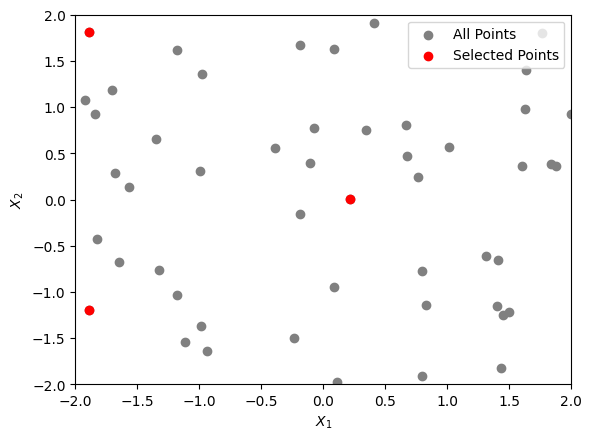

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Generate random points
points = np.random.uniform(-2, 2, (50, 2))

# Gaussian kernel function
def gaussian_kernel(x, y, sigma=1.0):
    squared_dist = np.sum((x - y) ** 2)
    return np.exp(-squared_dist / (2 * sigma ** 2))

# Compute distances using the Gaussian kernel
dist_matrix = cdist(points, points, metric=lambda u, v: gaussian_kernel(u, v, sigma=0.5))
inverted_dist_matrix = 1 - dist_matrix

# Select points
selected_points_indices = [np.random.randint(0, len(points))]
for _ in range(2):
    min_dist_to_selected = np.min(inverted_dist_matrix[:, selected_points_indices], axis=1)
    next_point_index = np.argmax(min_dist_to_selected)
    selected_points_indices.append(next_point_index)

selected_points = points[selected_points_indices]

# Extract and print the submatrix of the Gaussian kernel distances for the selected points
selected_points_kernel_matrix = dist_matrix[np.ix_(selected_points_indices, selected_points_indices)]
print("Selected Points Kernel Matrix:")
print(np.array2string(selected_points_kernel_matrix, formatter={'float_kind':lambda x: "%.2e" % x}))

plt.scatter(points[:, 0], points[:, 1], label='All Points', color = 'grey')
plt.scatter(selected_points[:, 0], selected_points[:, 1], color='r', label='Selected Points')
plt.legend(loc='upper right')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()